# Basic Clustering EDA





## Setup


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
sns.set()

## Loading Data

In [2]:
def save_pickle(filename, save_data):
    """
    picklenize the data.

    filename : str
        pickle filename
    data : free datatype
        some data will be picklenized

    return : None
    """
    #logger.info("save_pickle -> {}".format(filename))
    with open(filename, 'wb') as sf:
        pickle.dump(save_data, sf)

def load_pickle(filename):
    """
    unpicklenize the data.

    filename : str
        pickle filename

    return : data
    """
    #logger.info("load_pickle <- {}".format(filename))
    with open(filename, 'rb') as lf:
        load_data = pickle.load(lf)
    return load_data

In [3]:
path = '.\..\..\dataset\PSD_to_Pandas\pump_6dB_00020406_full_spectrum_128.pkl'
df = load_pickle(path)

In [4]:
df.head()

,path,abnormal,ID,file,machine,SNR,218.75,250.0,281.25,312.5,...,7718.75,7750.0,7781.25,7812.5,7843.75,7875.0,7906.25,7937.5,7968.75,8000.0
0,\dataset\6dB\pump\id_00\normal\00000000.wav,0,00,00000000,pump,6dB,0.000004,0.000003,0.000002,0.000002,...,5.316734e-08,4.912297e-08,4.514861e-08,4.101670e-08,3.675315e-08,3.258964e-08,2.884488e-08,2.584378e-08,2.388666e-08,1.160220e-08
1,\dataset\6dB\pump\id_00\normal\00000001.wav,0,00,00000001,pump,6dB,0.000003,0.000003,0.000002,0.000002,...,4.854261e-08,4.483064e-08,4.085615e-08,3.666346e-08,3.244671e-08,2.848889e-08,2.507934e-08,2.246389e-08,2.082307e-08,1.013221e-08
2,\dataset\6dB\pump\id_00\normal\00000002.wav,0,00,00000002,pump,6dB,0.000002,0.000002,0.000002,0.000001,...,5.378221e-08,4.898495e-08,4.364978e-08,3.830554e-08,3.348502e-08,2.945001e-08,2.619801e-08,2.369038e-08,2.203722e-08,1.072503e-08
3,\dataset\6dB\pump\id_00\normal\00000003.wav,0,00,00000003,pump,6dB,0.000004,0.000003,0.000003,0.000002,...,6.512921e-08,5.893400e-08,5.186951e-08,4.495403e-08,3.882366e-08,3.368394e-08,2.954767e-08,2.645704e-08,2.452590e-08,1.193362e-08
4,\dataset\6dB\pump\id_00\normal\00000004.wav,0,00,00000004,pump,6dB,0.000003,0.000002,0.000002,0.000001,...,5.914793e-08,5.402140e-08,4.937083e-08,4.518709e-08,4.144084e-08,3.815570e-08,3.540896e-08,3.331252e-08,3.198863e-08,1.576743e-08


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4205 entries, 0 to 4204
Columns: 256 entries, path to 8000.0
dtypes: float64(250), object(6)
memory usage: 8.2+ MB


In [6]:
df.describe()

,218.75,250.00,281.25,312.50,343.75,375.00,406.25,437.50,468.75,500.00,...,7718.75,7750.00,7781.25,7812.50,7843.75,7875.00,7906.25,7937.50,7968.75,8000.00
count,4.205000e+03,4.205000e+03,4.205000e+03,4.205000e+03,4.205000e+03,4.205000e+03,4.205000e+03,4.205000e+03,4.205000e+03,4.205000e+03,...,4.205000e+03,4.205000e+03,4.205000e+03,4.205000e+03,4.205000e+03,4.205000e+03,4.205000e+03,4.205000e+03,4.205000e+03,4.205000e+03
mean,5.931106e-06,5.154201e-06,4.385441e-06,3.892323e-06,3.790864e-06,3.995439e-06,4.272094e-06,4.368923e-06,4.147906e-06,3.641243e-06,...,3.386306e-08,3.128393e-08,2.871046e-08,2.619571e-08,2.383421e-08,2.170988e-08,1.989653e-08,1.848904e-08,1.759370e-08,8.643369e-09
std,5.677513e-06,5.119615e-06,4.862077e-06,5.350992e-06,6.576863e-06,8.223033e-06,9.740068e-06,1.049606e-05,1.009603e-05,8.646622e-06,...,4.132355e-08,3.900647e-08,3.608540e-08,3.276075e-08,2.936627e-08,2.624135e-08,2.364479e-08,2.174310e-08,2.061146e-08,1.012069e-08
min,2.108944e-07,1.871966e-07,1.628543e-07,1.437357e-07,1.357622e-07,1.461929e-07,1.772929e-07,2.204773e-07,2.579697e-07,2.735738e-07,...,2.180783e-10,2.240357e-10,1.861929e-10,1.514424e-10,1.673302e-10,1.844803e-10,1.556216e-10,1.322024e-10,1.599437e-10,7.885398e-11
25%,2.805031e-06,2.334984e-06,1.939897e-06,1.733770e-06,1.579713e-06,1.406948e-06,1.283788e-06,1.181746e-06,1.109091e-06,1.036511e-06,...,1.065747e-08,9.629803e-09,8.725706e-09,8.034452e-09,7.364948e-09,6.688376e-09,6.117283e-09,5.718247e-09,5.428885e-09,2.663811e-09
50%,4.226884e-06,3.575048e-06,2.940783e-06,2.399772e-06,2.049277e-06,1.791573e-06,1.612489e-06,1.519296e-06,1.532274e-06,1.537763e-06,...,2.390660e-08,2.168218e-08,1.952067e-08,1.745233e-08,1.580279e-08,1.450603e-08,1.347442e-08,1.279868e-08,1.236971e-08,6.130808e-09
75%,5.675316e-06,5.315224e-06,4.742124e-06,3.769689e-06,2.978713e-06,2.627674e-06,2.617063e-06,2.701508e-06,2.673948e-06,2.536626e-06,...,4.552586e-08,4.153099e-08,3.771390e-08,3.387325e-08,3.045593e-08,2.832565e-08,2.595443e-08,2.433692e-08,2.319920e-08,1.137909e-08
max,3.100268e-05,3.484979e-05,4.412388e-05,5.585425e-05,7.185726e-05,9.172345e-05,1.107962e-04,1.214984e-04,1.180223e-04,1.007610e-04,...,5.116128e-07,4.842142e-07,4.432167e-07,3.920642e-07,3.403797e-07,2.971351e-07,2.668789e-07,2.490969e-07,2.405235e-07,1.190310e-07


In [7]:
# let's get the frequencies of these bins
frequ = df.columns[df.dtypes==np.float64]

descriptive = [label for label in df.columns[df.dtypes==np.object] if not 'abnormal' in label]

target = ['abnormal']

IDs = df.ID.unique()

In [8]:
descriptive

['path', 'ID', 'file', 'machine', 'SNR']

C:\Users\bendi\.conda\envs\mimii-tf2-gpu\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\bendi\.conda\envs\mimii-tf2-gpu\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\bendi\.conda\envs\mimii-tf2-gpu\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\bendi\.conda\envs\mimii-tf2-gpu\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\bendi\.conda\envs\mimii-tf2-gpu\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\bendi\.conda\envs\mimii-tf2-gpu\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\bend

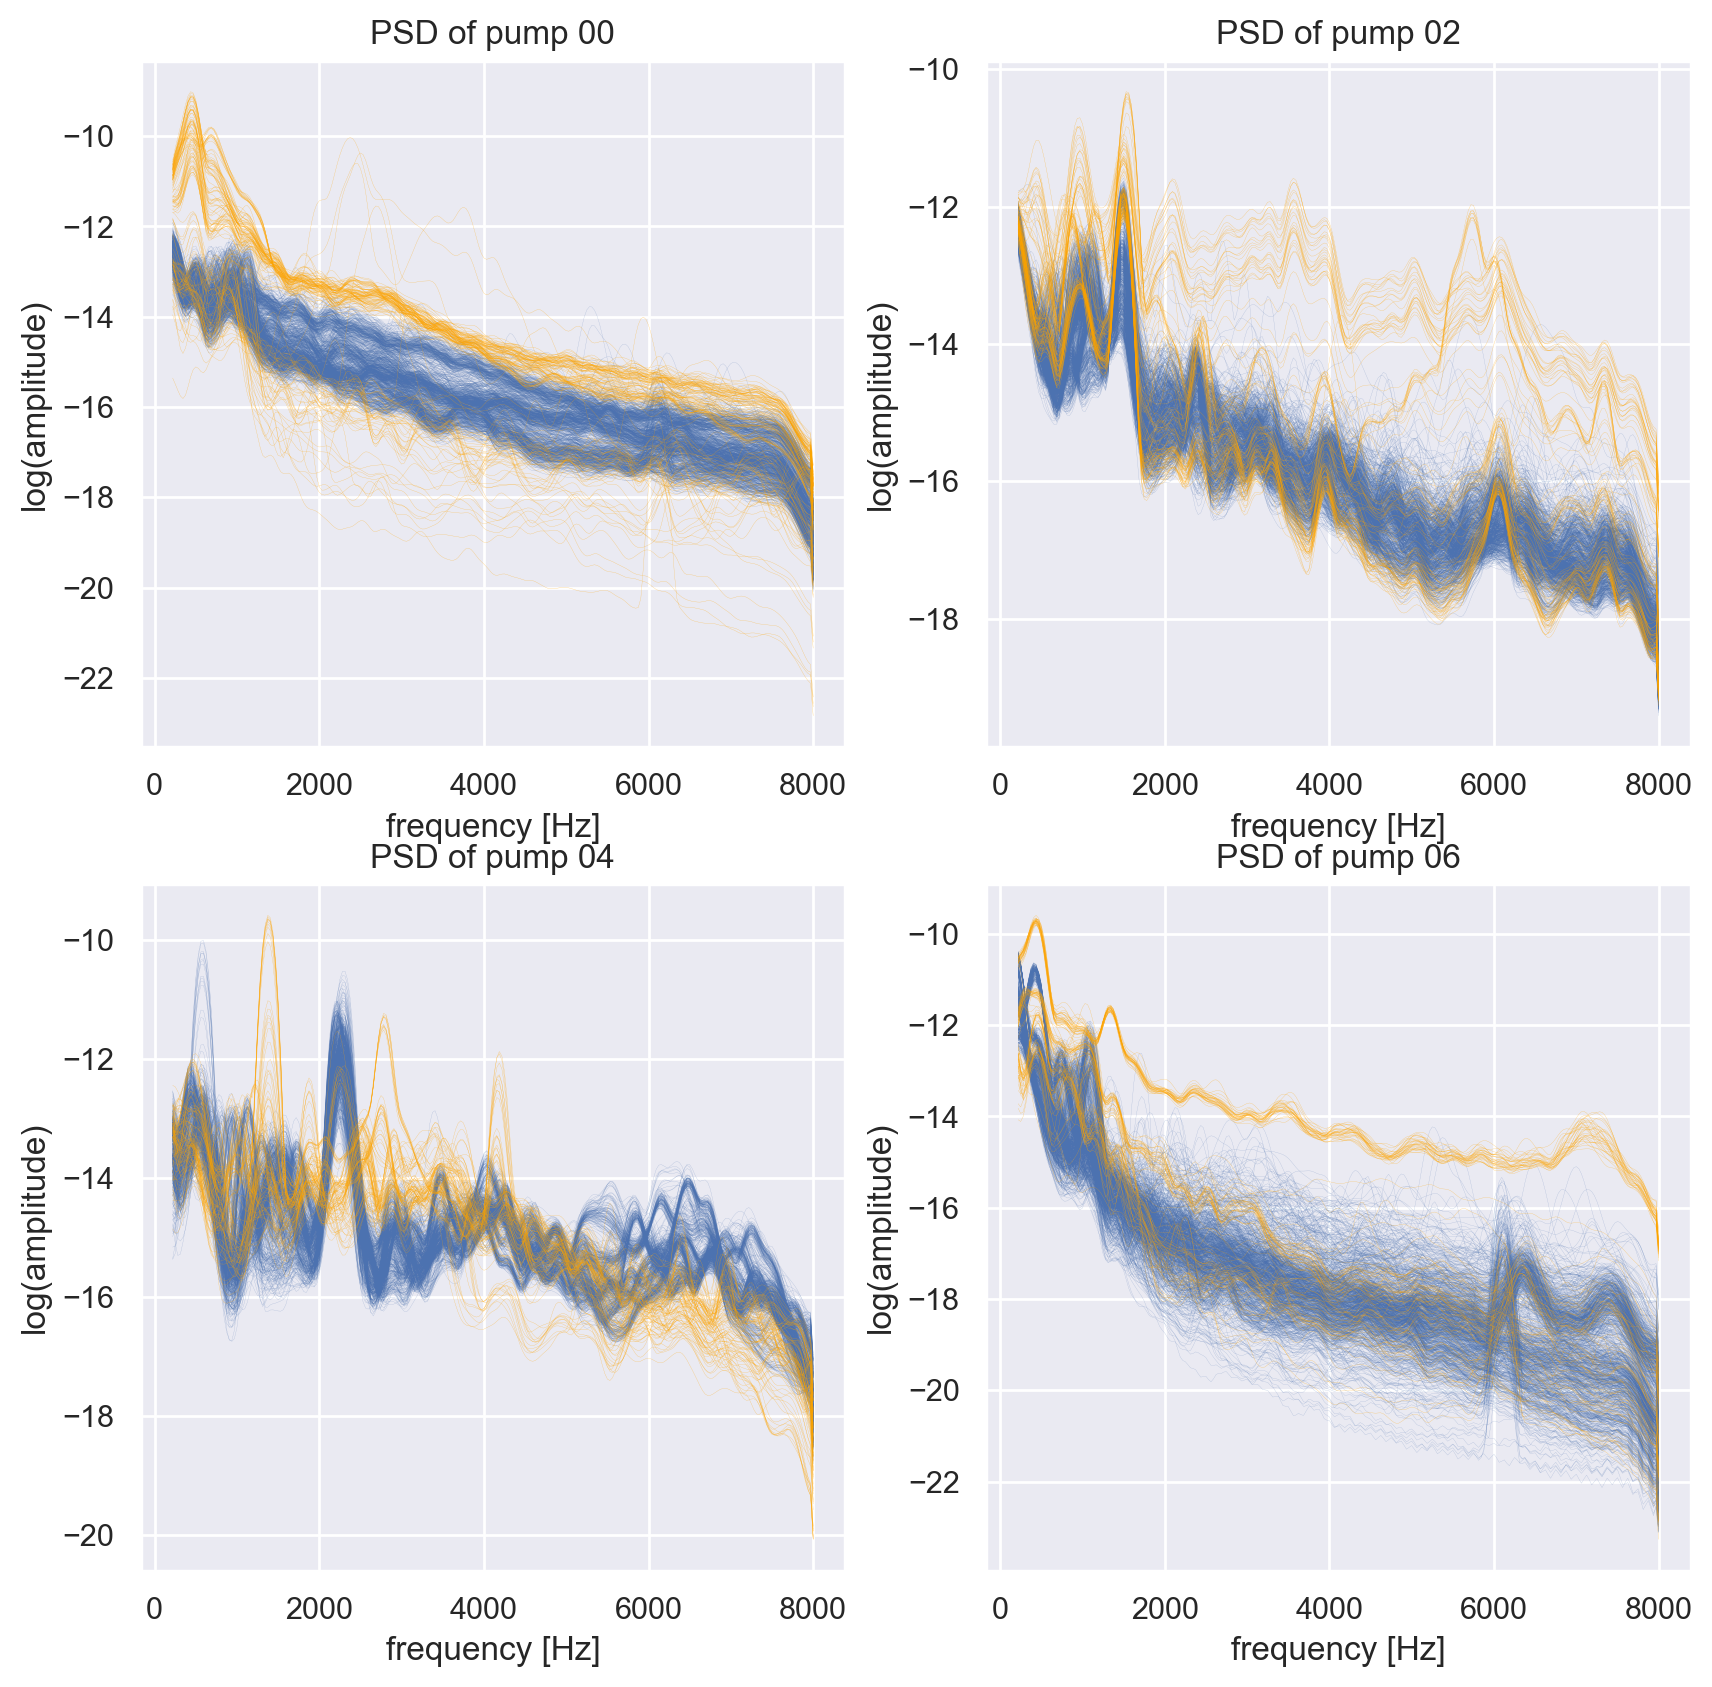

In [9]:
plt.figure(figsize=(10, 10), dpi=200)

for i, ID in enumerate(IDs):
    plt.subplot(2, 2, i+1)
    ax1 = plt.plot(frequ, df[df.ID == ID][frequ][df.abnormal==0].apply(lambda x : np.log(x)).T
                                , linewidth=.1, alpha=.4, color='b'
                                , label='normal op.');
    ax2 = plt.plot(frequ, df[df.ID == ID][frequ][df.abnormal==1].apply(lambda x : np.log(x)).T
                                , linewidth=.1, alpha=.6, color='orange', label='abnormal op.');
    plt.xlabel('frequency [Hz]')
    plt.ylabel('log(amplitude)')
    plt.title('PSD of pump {00}'.format(ID))

#plt.legend()
plt.show()

## Features Explained

## Metrics

### Distance Metrics

The distance of two feature vectors: 

#### Euclidian Distance

### Loss Metrics

#### Unsupervised

#### Supervised
silhouette_score, davies_bouldin_score, v_measure_score

In [10]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, v_measure_score

## Scaling



In [11]:
# Logtransform

In [12]:
# StandardScaler
from sklearn.preprocessing import StandardScaler

# fit the scaler on the "normal" operation data
scaler = StandardScaler()
X = {}
y = {}
for ID in IDs:
    scaler.fit(df[df.ID==ID][df['abnormal']==0][frequ])

    # transform all data, including "abnormal" operation
    X[ID] = scaler.transform(df[df.ID==ID][frequ])
    
    # to properly mask the operation type in the future we will create the target value accordingly
    y[ID] = df.abnormal[df.ID==ID]

C:\Users\bendi\.conda\envs\mimii-tf2-gpu\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\bendi\.conda\envs\mimii-tf2-gpu\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\bendi\.conda\envs\mimii-tf2-gpu\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\bendi\.conda\envs\mimii-tf2-gpu\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


## Dimensionality Reduction


### Principal component analysis - PCA

In [13]:
from sklearn.decomposition import PCA
n_prin_comp = 50

X_pca = {}
PCAs = {}
for ID in IDs:
    PCAs[ID] = PCA(n_components=n_prin_comp, svd_solver='full')
    # fit the PCA only on the "normal" operation data
    PCAs[ID].fit(X[ID][y[ID]==0])

    # transform all data accordingly
    X_pca[ID] = PCAs[ID].transform(X[ID])

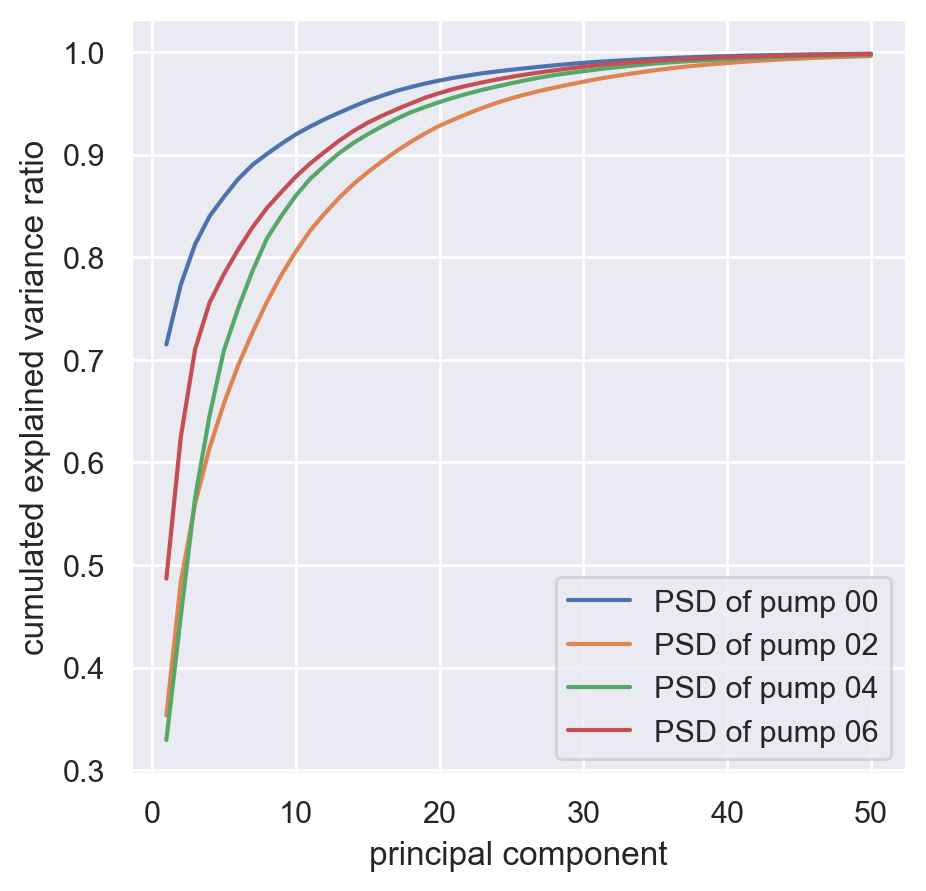

In [14]:
plt.figure(figsize=(10, 10), dpi=200)

for i, ID in enumerate(IDs):
    plt.plot(range(1,n_prin_comp+1), np.cumsum(PCAs[ID].explained_variance_ratio_)
                    , label='PSD of pump {00}'.format(ID))
    plt.xlabel('principal component')
    plt.ylabel('cumulated explained variance ratio')
    plt.legend()
plt.show()

In [15]:
X_pca[ID][:,0]

array([ -7.37685701,   6.97879622,  16.89981058, ...,  -7.7756092 ,
        -7.51907886, -10.39616671])

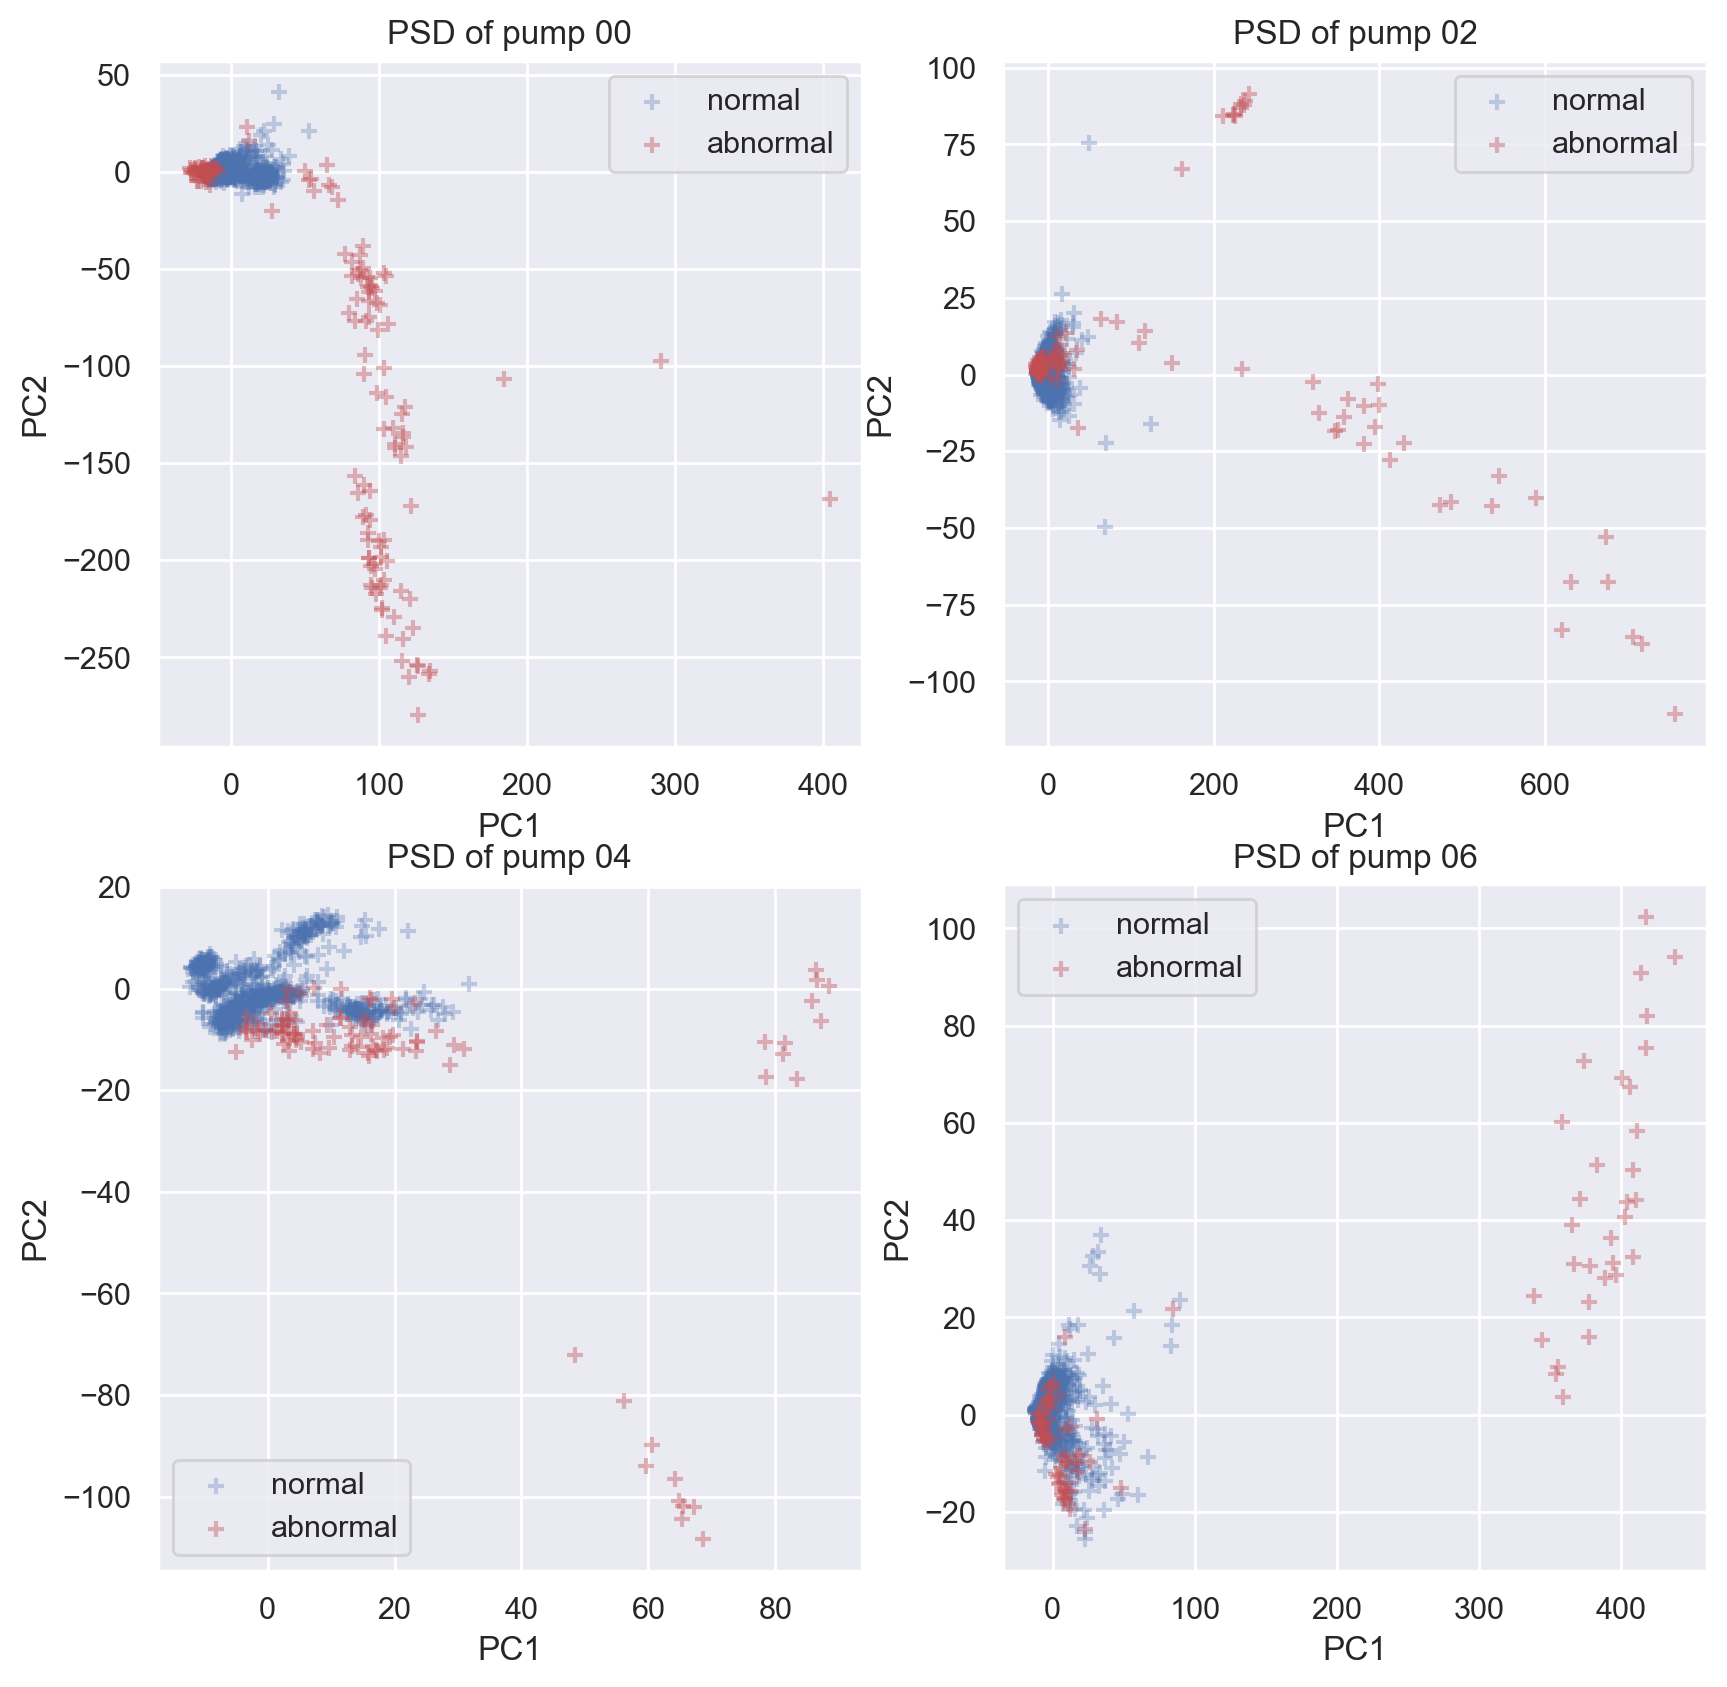

In [16]:
plt.figure(figsize=(10, 10), dpi=200)
for i, ID in enumerate(IDs):
    plt.subplot(2, 2, i+1)
    ax1 = plt.scatter(X_pca[ID][y[ID]==0][:,0], X_pca[ID][y[ID]==0][:,1], color='b'
                        , cmap='seismic', marker='+'
                        , alpha=.3, label=('abnormal', 'normal'))
    ax2 = plt.scatter(X_pca[ID][y[ID]==1][:,0], X_pca[ID][y[ID]==1][:,1], color='r'
                        , cmap='seismic', marker='+'
                        , alpha=.4, label=('abnormal', 'normal'))
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PSD of pump {00}'.format(ID))
    plt.legend((ax1, ax2), ('normal', 'abnormal'))
plt.show()




C:\Users\bendi\.conda\envs\mimii-tf2-gpu\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


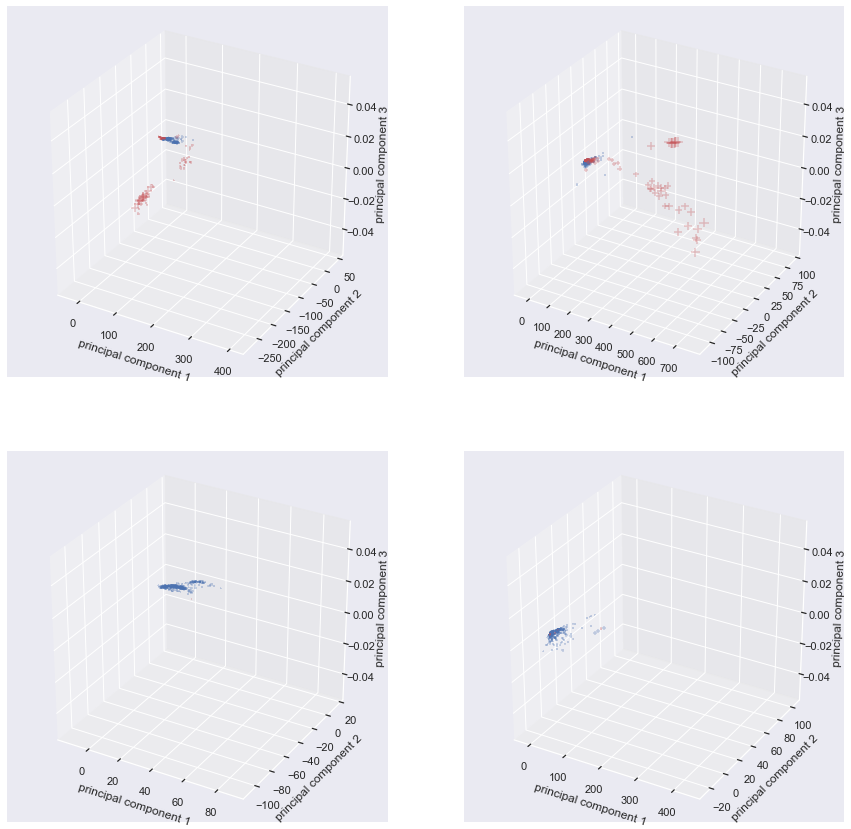

In [17]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,15))
for i, ID in enumerate(IDs):
    ax = plt.subplot(2, 2, i+1, projection='3d')

    ax1 = plt.scatter(X_pca[ID][y[ID]==0][:,0], X_pca[ID][y[ID]==0][:,1], X_pca[ID][y[ID]==0][:,2]
                        , color='b', cmap='seismic', marker='+'
                        , alpha=.3, label=('abnormal', 'normal'))
    ax2 = plt.scatter(X_pca[ID][y[ID]==1][:,0], X_pca[ID][y[ID]==1][:,1], X_pca[ID][y[ID]==1][:,2]
                        , color='r', cmap='seismic', marker='+'
                        , alpha=.3, label=('abnormal', 'normal'))

    #ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=df.abnormal+1, cmap='seismic', marker='+', alpha=.3)

    ax.set_xlabel('principal component 1')
    ax.set_ylabel('principal component 2')
    ax.set_zlabel('principal component 3')

    # ax.azim = 225
    # ax.elev = -45
    ax.dist = 10

plt.show()

### t-SNE

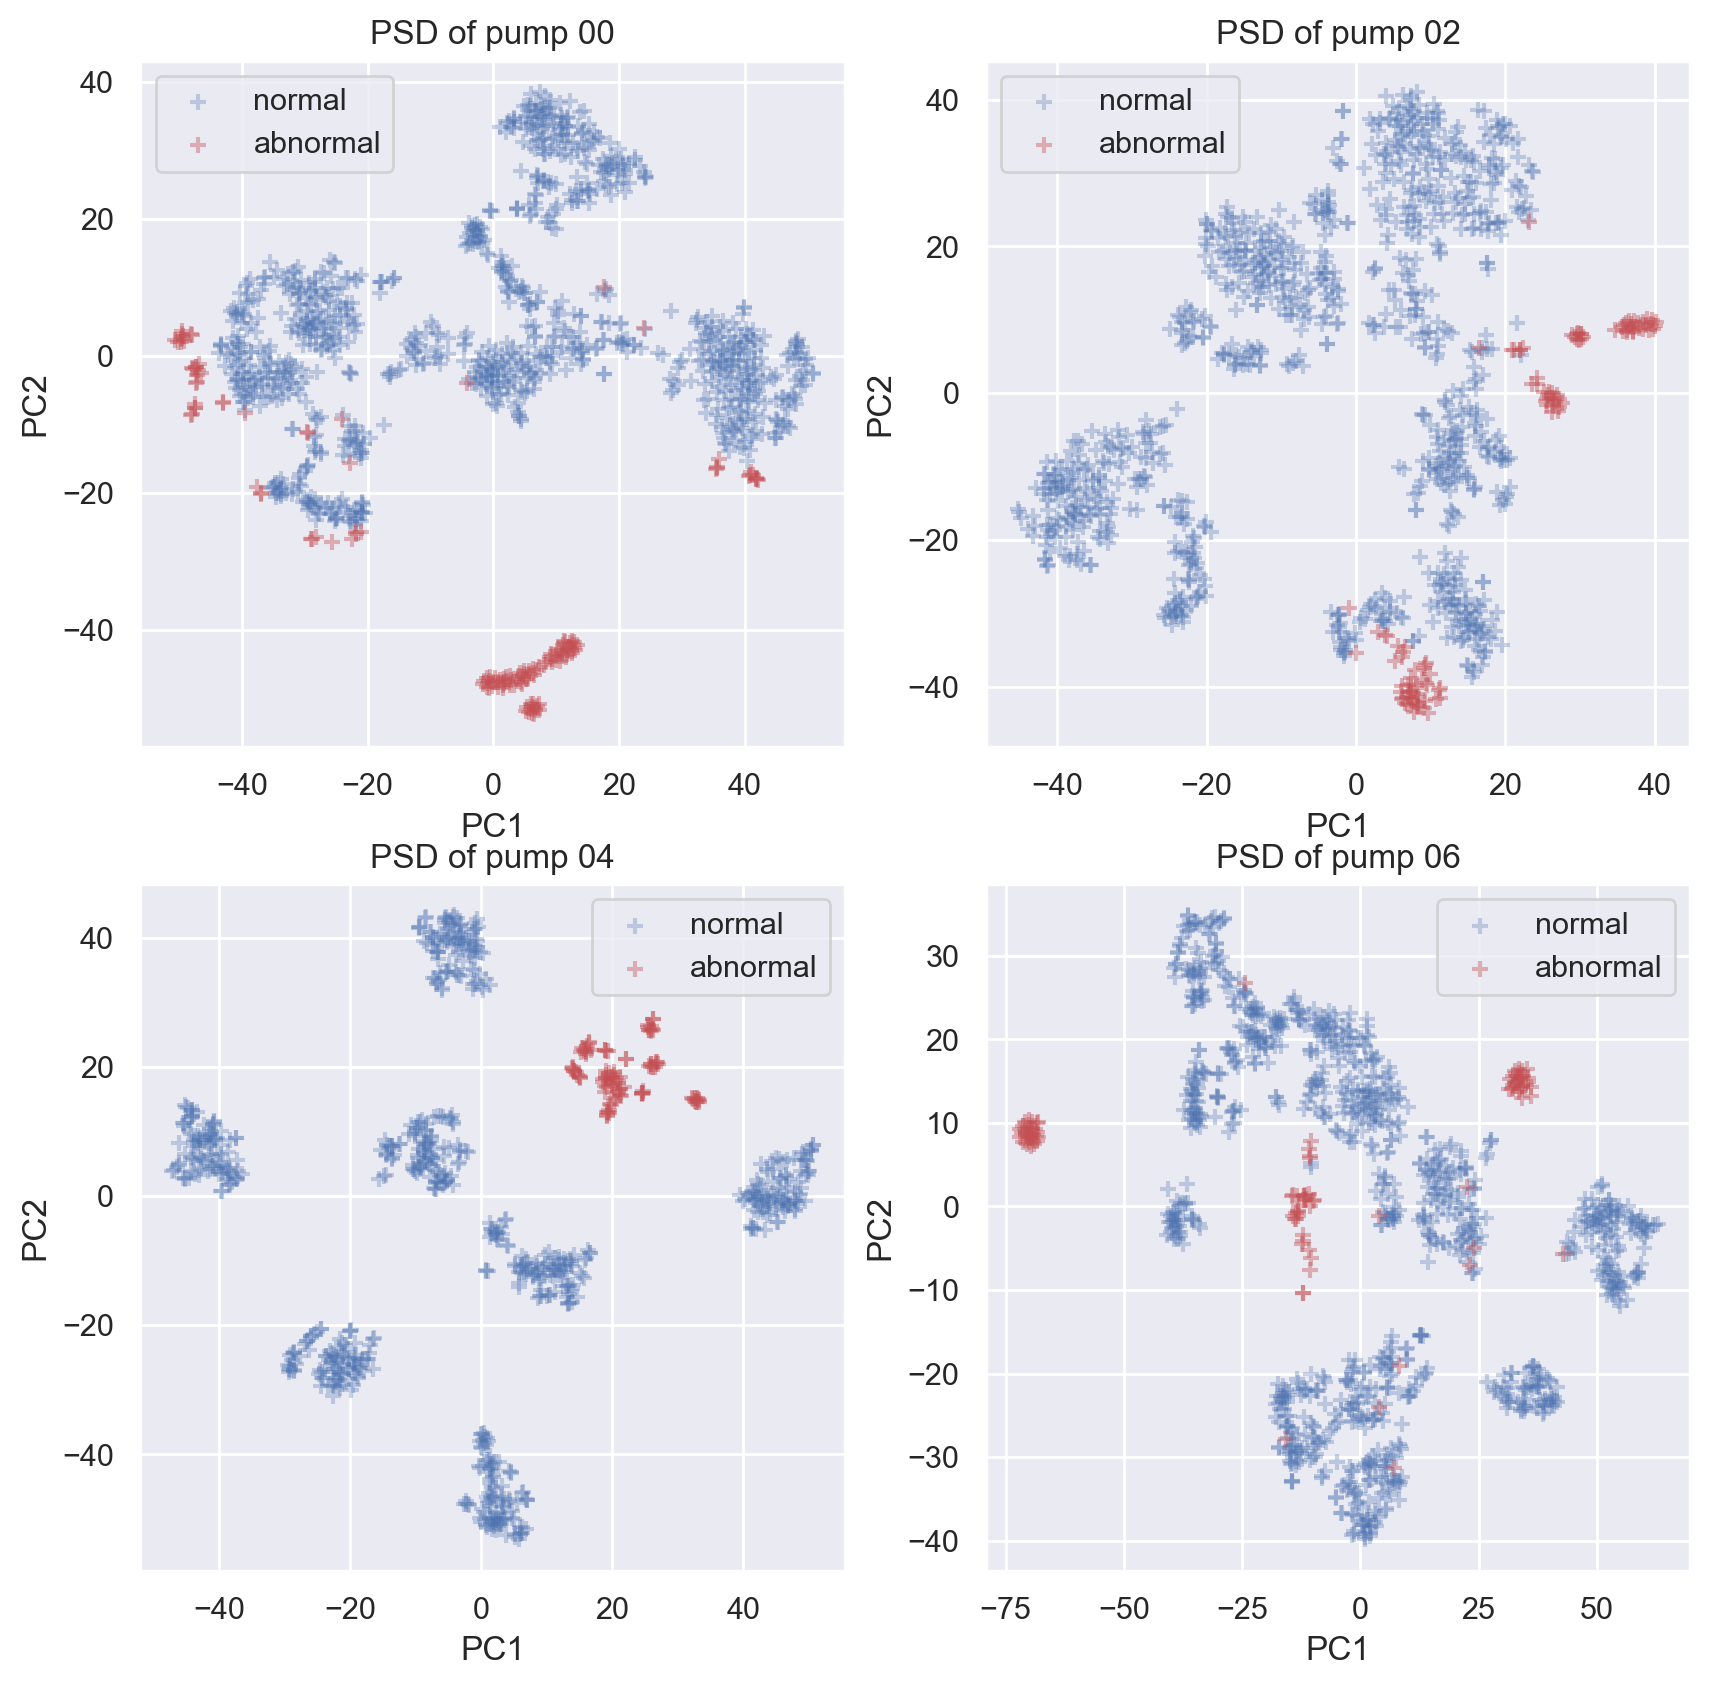

In [19]:
from sklearn.manifold import TSNE

t_sne = TSNE(n_components=2)
X_tsne = {}

plt.figure(figsize=(10, 10), dpi=200)
for i, ID in enumerate(IDs):
    plt.subplot(2, 2, i+1)
        
    # transform all data
    X_tsne[ID] = t_sne.fit_transform(X[ID])
    
    ax1 = plt.scatter(X_tsne[ID][y[ID]==0][:,0], X_tsne[ID][y[ID]==0][:,1], color='b'
                        , cmap='seismic', marker='+'
                        , alpha=.3, label=('abnormal', 'normal'))
    ax2 = plt.scatter(X_tsne[ID][y[ID]==1][:,0], X_tsne[ID][y[ID]==1][:,1], color='r'
                        , cmap='seismic', marker='+'
                        , alpha=.4, label=('abnormal', 'normal'))
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PSD of pump {00}'.format(ID))
    plt.legend((ax1, ax2), ('normal', 'abnormal'))
plt.show()


## Clustering Methods

The following table shows a short summary of the methods https://scikit-learn.org/stable/modules/clustering.html


| Method name                  | Parameters                                                       | Scalability                                                 | Usecase                                                                   | Geometry (metric used)                       |
|------------------------------|------------------------------------------------------------------|-------------------------------------------------------------|---------------------------------------------------------------------------|----------------------------------------------|
| K-Means                      | number of clusters                                               | Very large n_samples, medium n_clusters with MiniBatch code | General-purpose, even cluster size, flat geometry, not too many clusters  | Distances between points                     |
| Affinity propagation         | damping, sample preference                                       | Not scalable with n_samples                                 | Many clusters, uneven cluster size, non-flat geometry                     | Graph distance (e.g. nearest-neighbor graph) |
| Mean-shift                   | bandwidth                                                        | Not scalable with n_samples                                 | Many clusters, uneven cluster size, non-flat geometry                     | Distances between points                     |
| Spectral clustering          | number of clusters                                               | Medium n_samples, small n_clusters                          | Few clusters, even cluster size, non-flat geometry                        | Graph distance (e.g. nearest-neighbor graph) |
| Ward hierarchical clustering | number of clusters or distance threshold                         | Large n_samples and n_clusters                              | Many clusters, possibly connectivity constraints                          | Distances between points                     |
| Agglomerative clustering     | number of clusters or distance threshold, linkage type, distance | Large n_samples and n_clusters                              | Many clusters, possibly connectivity constraints, non Euclidean distances | Any pairwise distance                        |
| DBSCAN                       | neighborhood size                                                | Very large n_samples, medium n_clusters                     | Non-flat geometry, uneven cluster sizes                                   | Distances between nearest points             |
| OPTICS                       | minimum cluster membership                                       | Very large n_samples, large n_clusters                      | Non-flat geometry, uneven cluster sizes, variable cluster density         | Distances between points                     |
| Gaussian mixtures            | many                                                             | Not scalable                                                | Flat geometry, good for density estimation                                | Mahalanobis distances to centers             |
| Birch                        | branching factor, threshold, optional global clusterer.          | Large n_clusters and n_samples                              | Large dataset, outlier removal, data reduction.                           | Euclidean distance between points            |


## K-means and the elbow plot

Question: Is KMeans able to identify two types of operation and how distinct is the separation?
As a measure we use:

1. Unsupervised metric: 
    
    a. KMeans-Score

2. Supervised metrics:
    
    a. Silhouette score
    
    b. V-Measure score

In [20]:
from sklearn.cluster import KMeans

# which dataset shall be inserted?
X_scaled = X_pca
#y = y

(1149,) [0 1]
(1149,) [0 1 2]
(1149,) [0 1 2 3]
(1149,) [0 1 2 3 4]
(1149,) [0 1 2 3 4 5]
(1149,) [0 1 2 3 4 5 6]
(1149,) [0 1 2 3 4 5 6 7]
(1149,) [0 1 2 3 4 5 6 7 8]
(1116,) [0 1]
(1116,) [0 1 2]
(1116,) [0 1 2 3]
(1116,) [0 1 2 3 4]
(1116,) [0 1 2 3 4 5]
(1116,) [0 1 2 3 4 5 6]
(1116,) [0 1 2 3 4 5 6 7]
(1116,) [0 1 2 3 4 5 6 7 8]
(802,) [0 1]
(802,) [0 1 2]
(802,) [0 1 2 3]
(802,) [0 1 2 3 4]
(802,) [0 1 2 3 4 5]
(802,) [0 1 2 3 4 5 6]
(802,) [0 1 2 3 4 5 6 7]
(802,) [0 1 2 3 4 5 6 7 8]
(1138,) [0 1]
(1138,) [0 1 2]
(1138,) [0 1 2 3]
(1138,) [0 1 2 3 4]
(1138,) [0 1 2 3 4 5]
(1138,) [0 1 2 3 4 5 6]
(1138,) [0 1 2 3 4 5 6 7]
(1138,) [0 1 2 3 4 5 6 7 8]


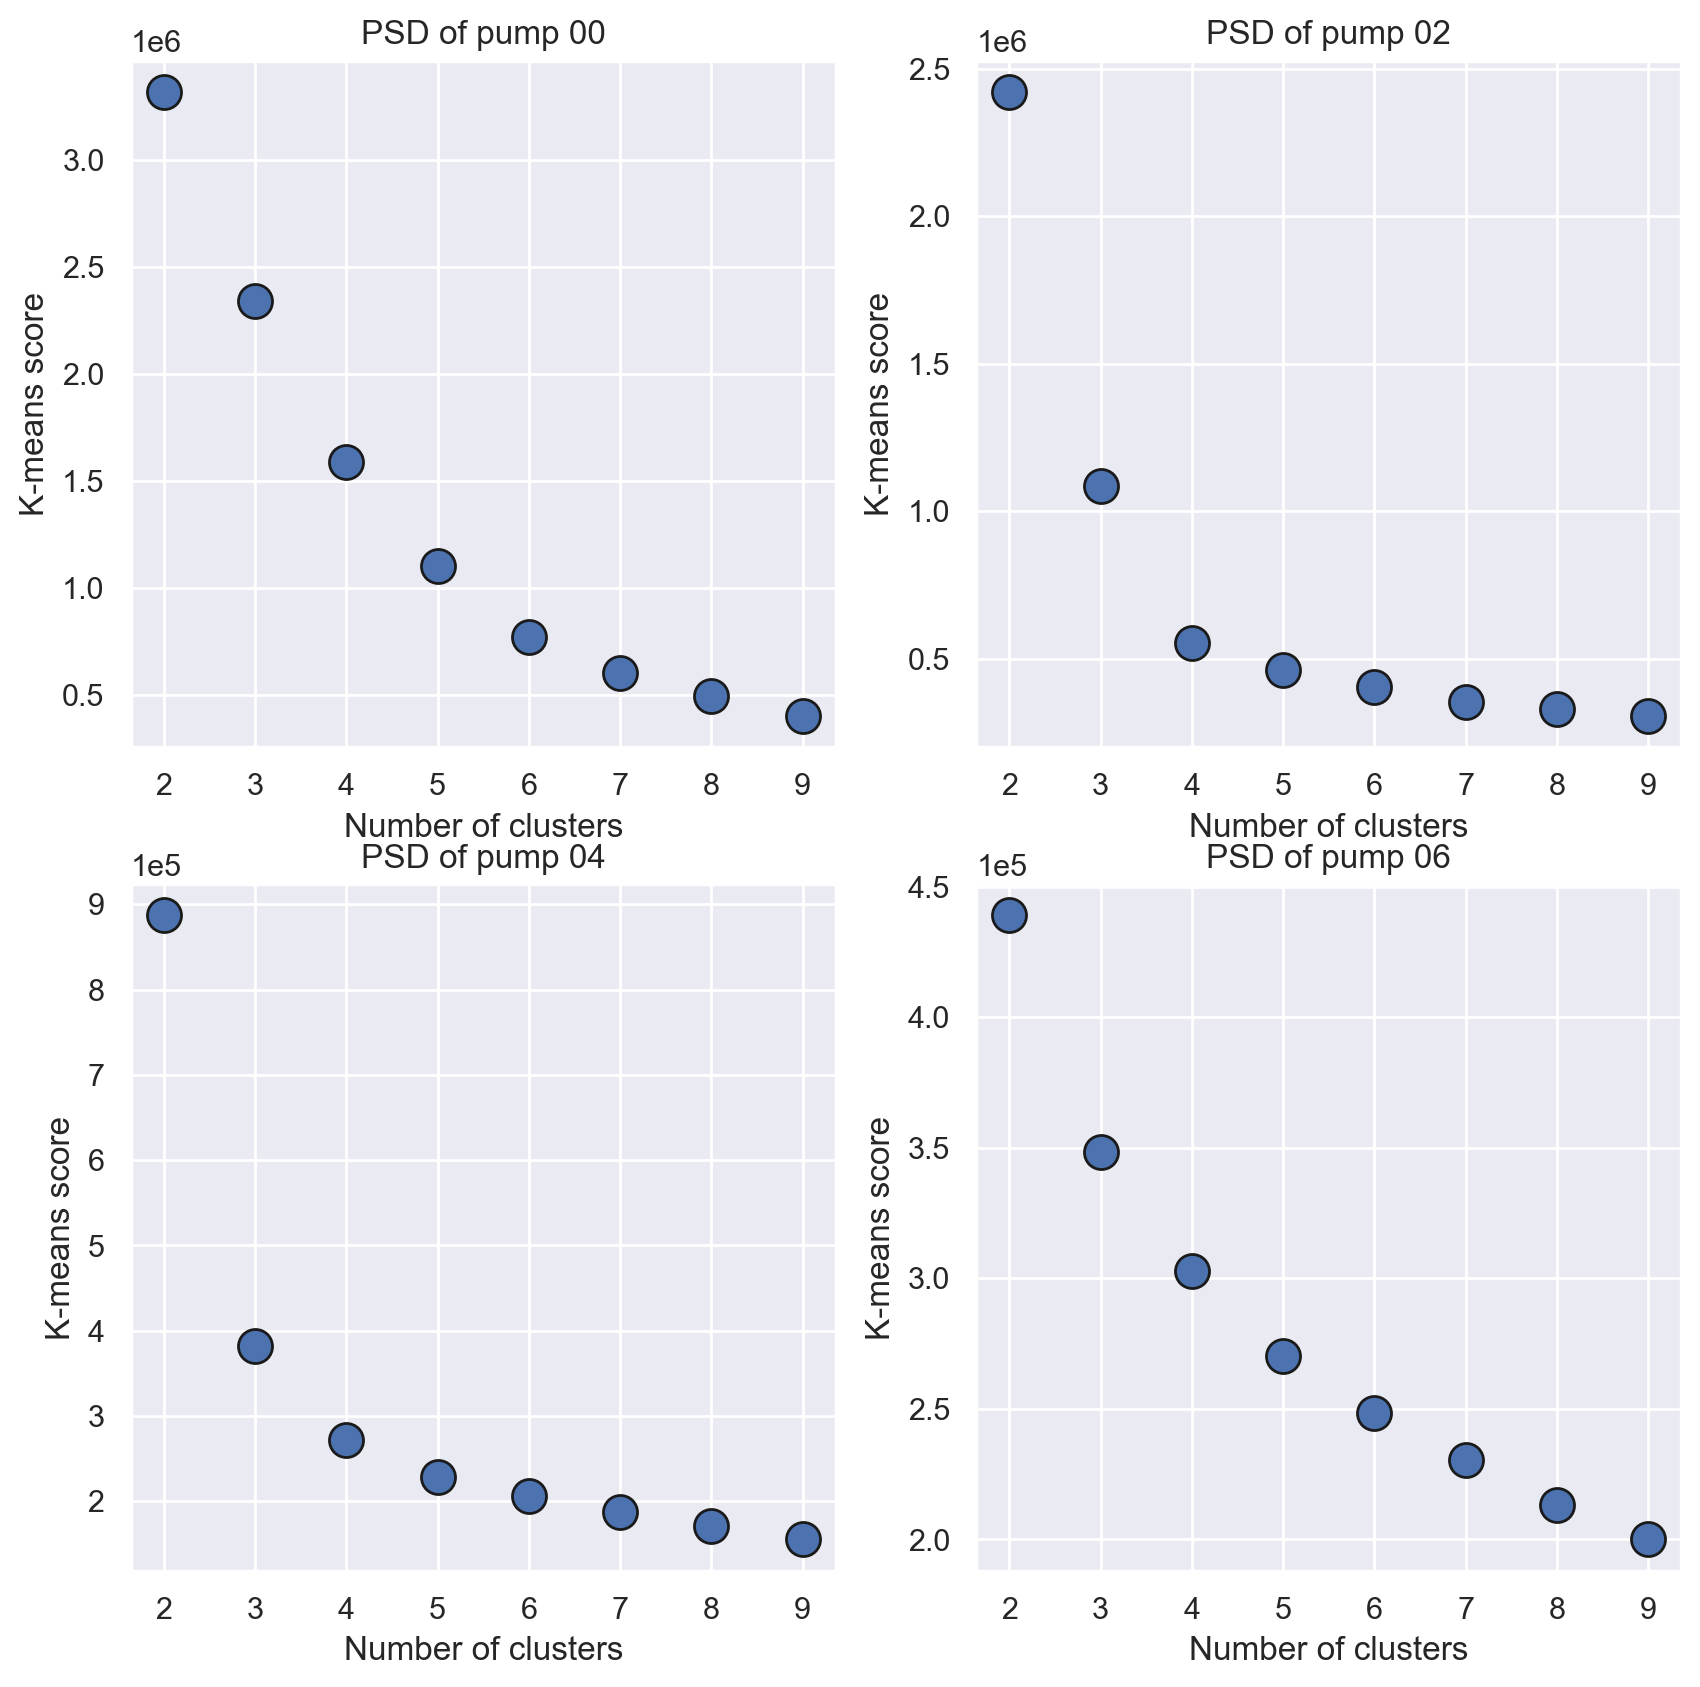

In [32]:
# set up some scores
km_scores = {}
km_silhouette = {}
vmeasure_score = {}
db_score = {}

n_clusters = 10

plt.figure(figsize=(10,10), dpi=200)

for i, ID in enumerate(IDs):
    
    km_scores[ID] = []
    km_silhouette[ID] = []
    vmeasure_score[ID] = []
    db_score[ID] = []
    
    for j in range(2,n_clusters):
        # train the k-Means-Clustering algorithm
        km = KMeans(n_clusters=j, n_jobs=-1, init='k-means++').fit(X_scaled[ID])
        preds = km.predict(X_scaled[ID])

        # calculate the score
        km_scores[ID].append(-km.score(X_scaled[ID]))
        km_silhouette[ID].append(silhouette_score(X_scaled[ID],y[ID]))
        vmeasure_score[ID].append(v_measure_score(y[ID],preds))
        db_score[ID].append(davies_bouldin_score(X_scaled[ID],preds))
        
    # create the plot
    plt.subplot(2, 2, i+1)
    
    plt.title('PSD of pump {00}'.format(ID))
    plt.scatter(x=[i for i in range(2,n_clusters)],y=km_scores[ID],s=150, edgecolor='k')
    plt.grid(True)
    plt.xlabel("Number of clusters")
    plt.ylabel("K-means score")
    plt.xticks([i for i in range(2,n_clusters)])
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.show()

## Hierachical Clustering

## Mean-shift Clustering

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# we will let the algorithm estimate the bandwith
ms_bandwidth = estimate_bandwidth(X_scaled)
print('Bandwith estimated to: {:.5}'.format(ms_bandwidth))
ms = MeanShift(bandwidth=ms_bandwidth, n_jobs=-1)
ms.fit(X_scaled)

In [ ]:
cluster_centers = ms.cluster_centers_
len(cluster_centers) # number of clusters

## DBSCAN

Consider [HDBSCAN](https://hdbscan.readthedocs.io/en/latest/) because it is multithreaded.